In [ ]:
import ndlib
import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import json
import warnings
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution

no display found. Using non-interactive Agg backend
no display found. Using non-interactive Agg backend


### Modifiche apportate alla libreria ndlib:

#### Modifiche ai colori 

file <tt>Opinion Evolution.py </tt>
- <tt>64. if v < lim_inf:
    node2col[n] = '#4458DA'
  elif lim_inf <= v <= lim_sup:
    node2col[n] = '#91EDB6'
  else:
    node2col[n] = '#DA042F'</tt>
- <tt>80: plt.xlabel("Iterations", fontsize=14)
- <tt>81: plt.ylabel(self.ylabel, fontsize=14)
- <tt>82: plt.legend(loc="best", fontsize=12)

In [ ]:
%run Utilyties.ipynb
%matplotlib inline

In [ ]:
data = read_data('../data/final/data_complete.json')

G = init_network(data)

Alcune informazioni iniziali sui dati sono:
* TOT Retweet =  29863
* TOT Quote =  1187
* TOT Mentions =  28068
* TOT Reply =  3000




In [ ]:
G0 = giant_component(G)

Creo il <b>Complete Graph H</b> da 3000 nodi casuali della G0

In [ ]:
import random as rd 

sample = rd.sample(G0.nodes, 3000)
H = nx.complete_graph(sample)

#associo ad ogni nodo del Complete Graph la propra classificazione 
labels = nx.get_node_attributes(G0, 'classification') 
nx.set_node_attributes(H, labels, 'classification')

# Deffaunt Model 

In [ ]:
def deff_model (network, epsilon, gamma, iterations):
    model = op.AlgorithmicBiasModel(network)

    # Model configuration
    config = mc.Configuration()
    config.add_model_parameter("epsilon", epsilon)
    config.add_model_parameter("gamma", gamma)  
    model.set_initial_status(config)

    # Simulation execution
    iterations = model.iteration_bunch(iterations)

    plt.figure(figsize=(8,5))
    viz = OpinionEvolution(model, iterations)
    viz.plot()

## Prepocessing

In [ ]:
#cambio il nome dei nodi per poterli passare a AlgorithmicBiasModel
mapping = dict(zip(G0, range(1, G0.number_of_nodes()+1)))
G0_l = nx.relabel_nodes(G0, mapping)
mapping = dict(zip(H, range(1, H.number_of_nodes()+1)))
H_l = nx.relabel_nodes(H, mapping)

## Crawled Data - Random Opinion

<b>With bias</b>:  
- Gamma 0,5 con epsilon 0.65 e 0.325
- Gamma 1 con epsilon 0.65 e 0.325
- Gamma 1,5 con epsilon 0.65 e 0.325
- Gamma 5 con epsilon 0.65 e 0.325

### Gamma = 0.5 

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [33:03<00:00,  1.98s/it]
No handles with labels found to put in legend.


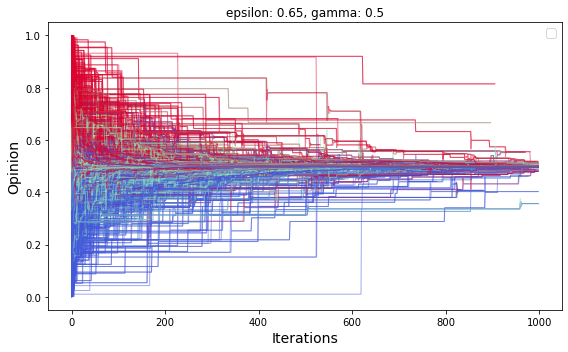

In [ ]:
deff_model(G0_l, 
           epsilon = 0.65, 
           gamma = 0.5, 
           iterations = 1000)

#### Epsilon = 0.325

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [34:25<00:00,  2.07s/it]
No handles with labels found to put in legend.


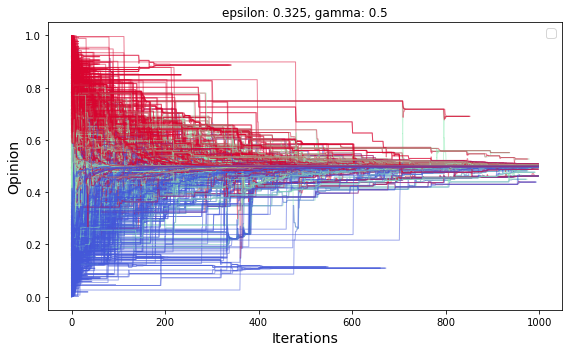

In [ ]:
deff_model(G0_l, 
           epsilon = 0.325, 
           gamma = 0.5, 
           iterations = 1000)

### Gamma = 1

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [36:15<00:00,  2.18s/it]
No handles with labels found to put in legend.


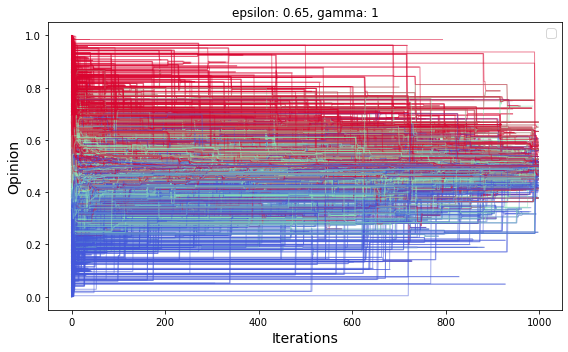

In [ ]:
deff_model(G0_l, 
           epsilon = 0.65, 
           gamma = 1, 
           iterations = 1000)

#### Epsilon = 0.325

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [34:37<00:00,  2.08s/it]
No handles with labels found to put in legend.


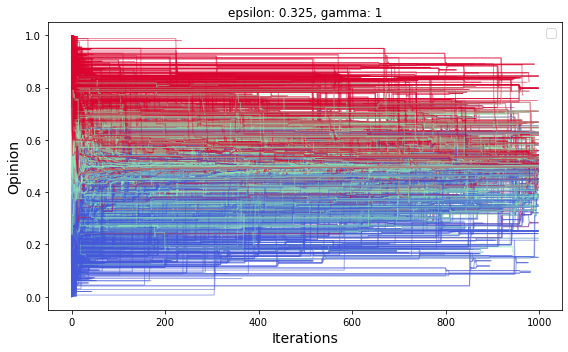

In [ ]:
deff_model(G0_l, 
           epsilon = 0.325, 
           gamma = 1, 
           iterations = 1000)

### Gamma = 1.5 

##### Epsilon = 0.65

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [18:41<00:00,  2.24s/it]
No handles with labels found to put in legend.


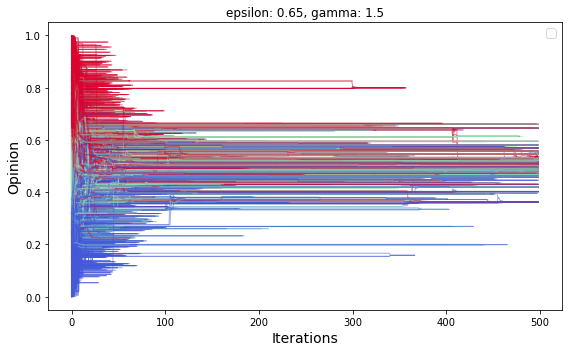

In [ ]:
deff_model(G0_l, 
           epsilon = 0.65, 
           gamma = 1.5, 
           iterations = 500)

#### Epsilon = 0.325

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [17:47<00:00,  2.13s/it]
No handles with labels found to put in legend.


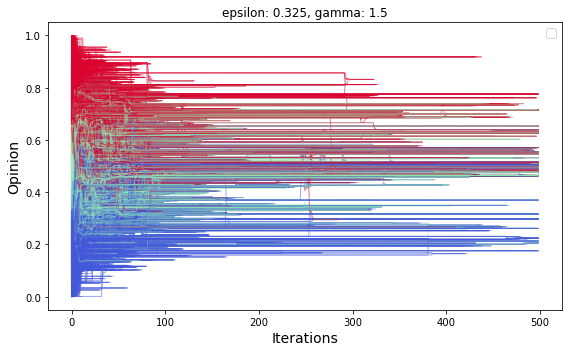

In [ ]:
deff_model(G0_l, 
           epsilon = 0.325, 
           gamma = 1.5, 
           iterations = 500)

### Gamma = 5 

##### Epsilon = 0.65

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [09:06<00:00,  2.19s/it]
No handles with labels found to put in legend.


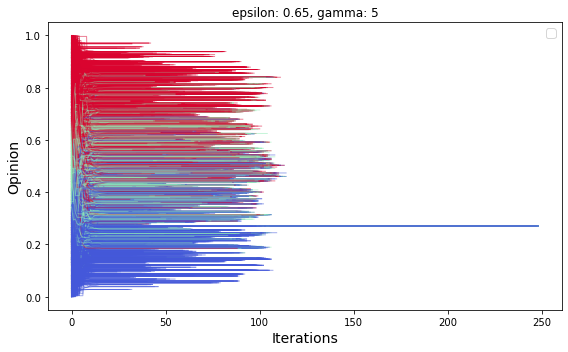

In [ ]:
deff_model(G0_l, 
           epsilon = 0.65, 
           gamma = 5, 
           iterations = 250)

#### Epsilon = 0.325

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [08:48<00:00,  2.11s/it]
No handles with labels found to put in legend.


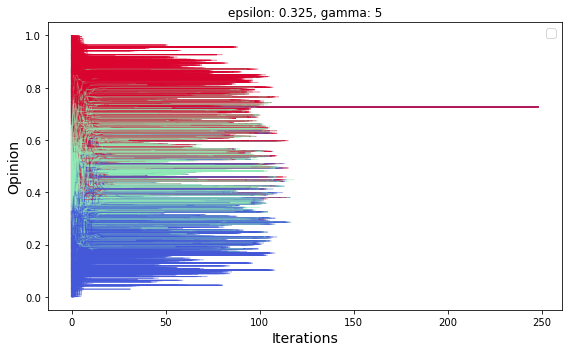

In [ ]:
deff_model(G0_l, 
           epsilon = 0.325, 
           gamma = 5, 
           iterations = 250)

<b>W/O bias</b>:  
- con epsilon 0.65 e 0.325

### Gamma = 0

##### Epsilon = 0.65

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [09:00<00:00,  2.16s/it]
No handles with labels found to put in legend.


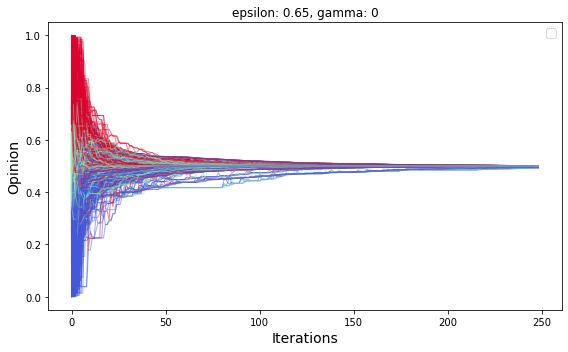

In [ ]:
deff_model(G0_l, 
           epsilon = 0.65, 
           gamma = 0, 
           iterations = 250)

#### Epsilon = 0.325

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [09:08<00:00,  2.19s/it]
No handles with labels found to put in legend.


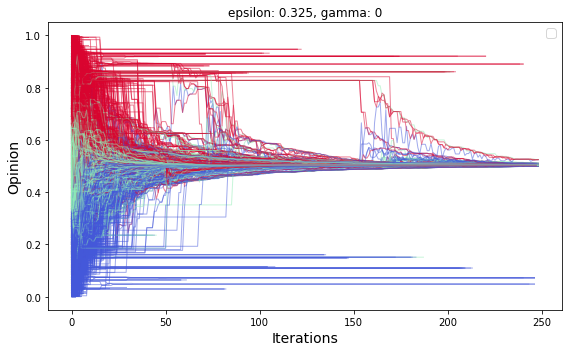

In [ ]:
deff_model(G0_l, 
           epsilon = 0.325, 
           gamma = 0, 
           iterations = 250)

## Mean field model

<b>With bias</b>:  
- Gamma 0,5 con epsilon 0.65 e 0.325
- Gamma 1 con epsilon 0.65 e 0.325
- Gamma 1,5 con epsilon 0.65 e 0.325
- Gamma 5 con epsilon 0.65 e 0.325


<b>Without bias</b>:  
- Gamma 0,5 con epsilon 0.65

### Gamma = 0.5

#### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [10:41<00:00, 25.65s/it]
No handles with labels found to put in legend.


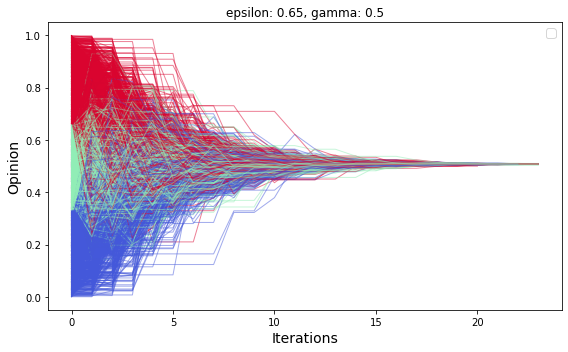

In [ ]:
deff_model(H_l, 
           epsilon = 0.65, 
           gamma = 0.5, 
           iterations = 25)

#### Epsilon = 0.325

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [09:34<00:00, 22.96s/it]
No handles with labels found to put in legend.


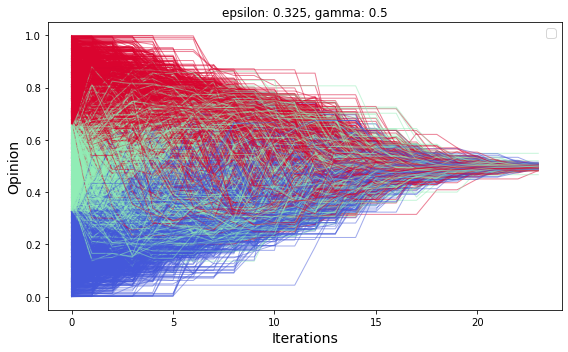

In [ ]:
deff_model(H_l, 
           epsilon = 0.325, 
           gamma = 0.5, 
           iterations = 25)

### Gamma = 1

#### Epsilon = 0.65

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [45:17<00:00, 27.18s/it]
No handles with labels found to put in legend.


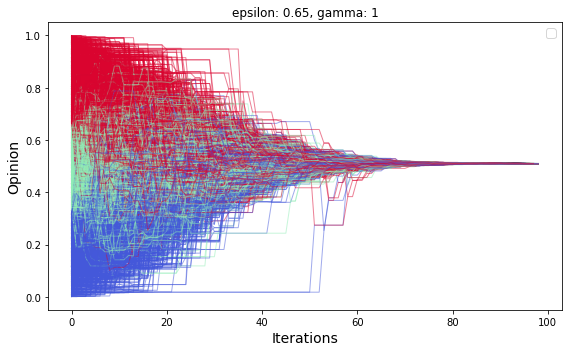

In [ ]:
deff_model(H_l, 
           epsilon = 0.65, 
           gamma = 1, 
           iterations = 100)

#### Epsilon = 0.325

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [43:53<00:00, 26.34s/it]
No handles with labels found to put in legend.


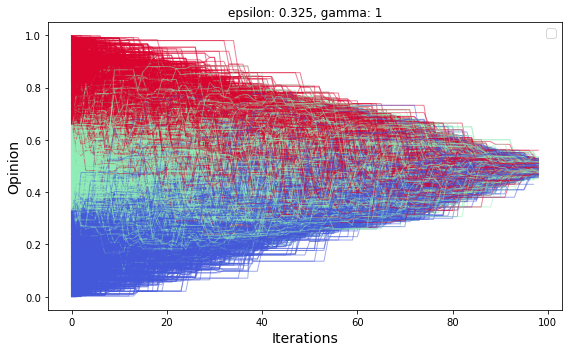

In [ ]:
deff_model(H_l, 
           epsilon = 0.325, 
           gamma = 1, 
           iterations = 100)

### Gamma = 1.5 

#### Epsilon = 0.65

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [39:14<00:00, 23.54s/it]
No handles with labels found to put in legend.


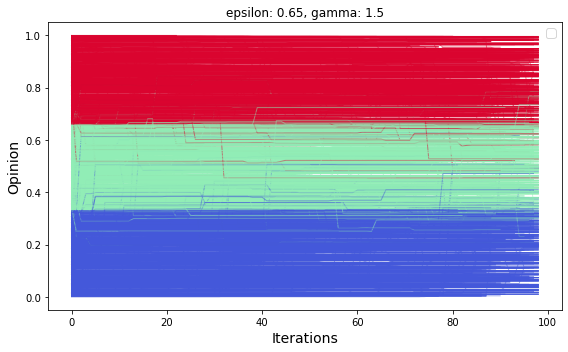

In [ ]:
deff_model(H_l, 
           epsilon = 0.65, 
           gamma = 1.5, 
           iterations = 100)

#### Epsilon = 0.325

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [18:55<00:00, 22.71s/it]
No handles with labels found to put in legend.


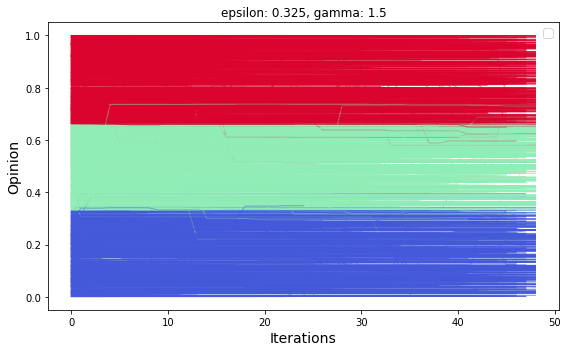

In [ ]:
deff_model(H_l, 
           epsilon = 0.325, 
           gamma = 1.5, 
           iterations = 50)

### Gamma =5 

#### Epsilon=0.65

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [43:43<00:00, 26.24s/it]
No handles with labels found to put in legend.


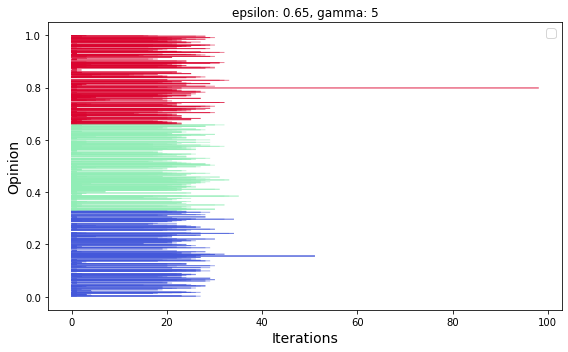

In [ ]:
deff_model(H_l, 
           epsilon = 0.65, 
           gamma = 5, 
           iterations = 100)

#### Epsilon=0.325

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [43:43<00:00, 26.24s/it]
No handles with labels found to put in legend.


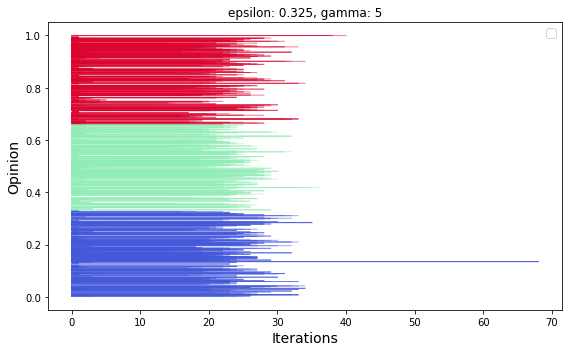

In [ ]:
deff_model(H_l, 
           epsilon = 0.325, 
           gamma = 5, 
           iterations = 100)

### Gamma = 0

#### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [10:28<00:00, 25.13s/it]
No handles with labels found to put in legend.


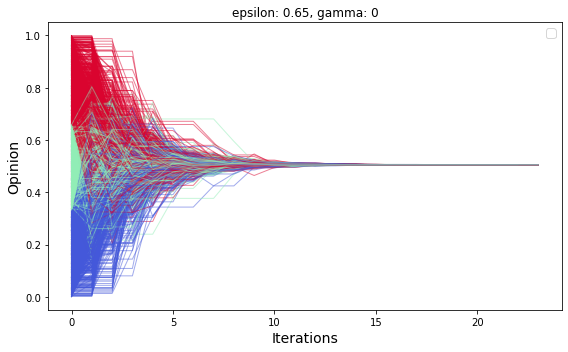

In [ ]:
deff_model(H_l, 
           epsilon = 0.65, 
           gamma = 0, 
           iterations = 25)

#### Epsilon = 0.325

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [10:27<00:00, 25.12s/it]
No handles with labels found to put in legend.


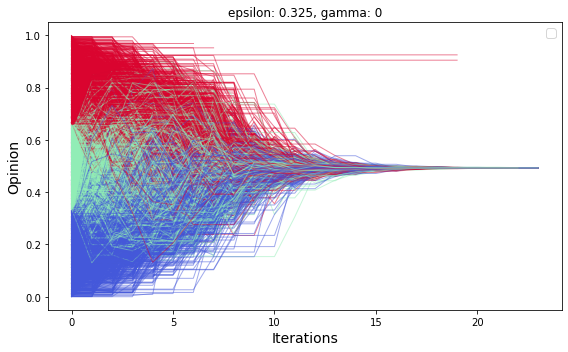

In [ ]:
deff_model(H_l, 
           epsilon = 0.325, 
           gamma = 0, 
           iterations = 25)